In [2]:
# 引入红酒数据
from sklearn.datasets import load_wine
# 引入决策树模型
from sklearn.tree import DecisionTreeClassifier
# 引入数据集划分函数
from sklearn.model_selection import train_test_split
# 引入评估函数
from sklearn.metrics import accuracy_score

# 加载红酒数据集
data = load_wine()
# 输出data的描述信息
print(data.DESCR)
X = data.data
Y = data.target


.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [3]:
# 划分数据集，25%作为测试集，75%作为训练集
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

# 创建决策树分类器对象
dtc = DecisionTreeClassifier(criterion="entropy")
# 训练模型
dtc.fit(X_train, Y_train)
# 预测测试集
Y_pred = dtc.predict(X_test)
# 计算准确率
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9555555555555556


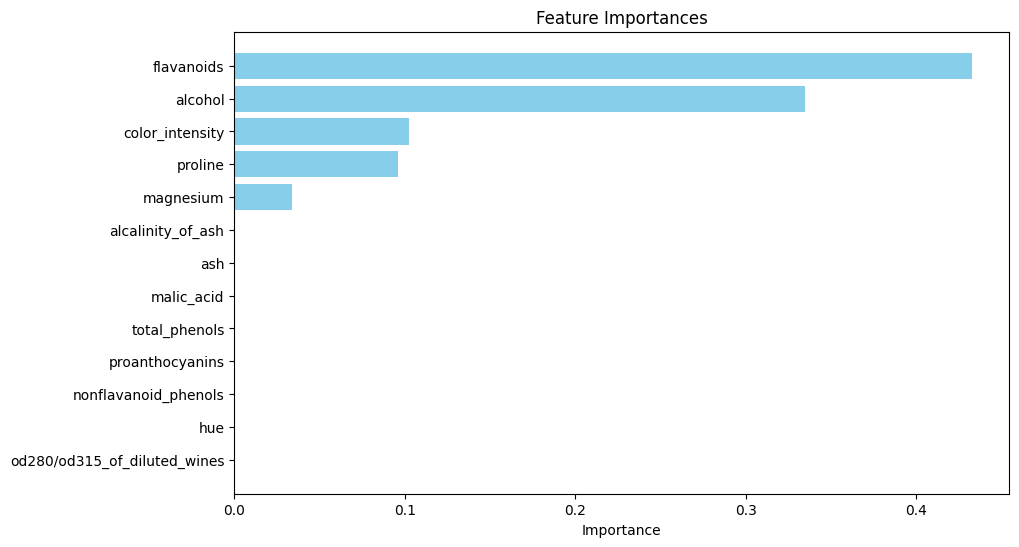

In [ ]:
# 引入绘图函数
import matplotlib.pyplot as plt
import pandas as pd

# 获取特征名称
feature_names = data.feature_names
# 获取类别名称
class_names = data.target_names
# 获取每个特征的重要性
importances = dtc.feature_importances_
# 创建一个DataFrame来存储特征及其重要性
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
# 按重要性排序
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
# 绘制特征重要性条形图
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # 反转y轴，使最重要的特征在顶部
plt.show()


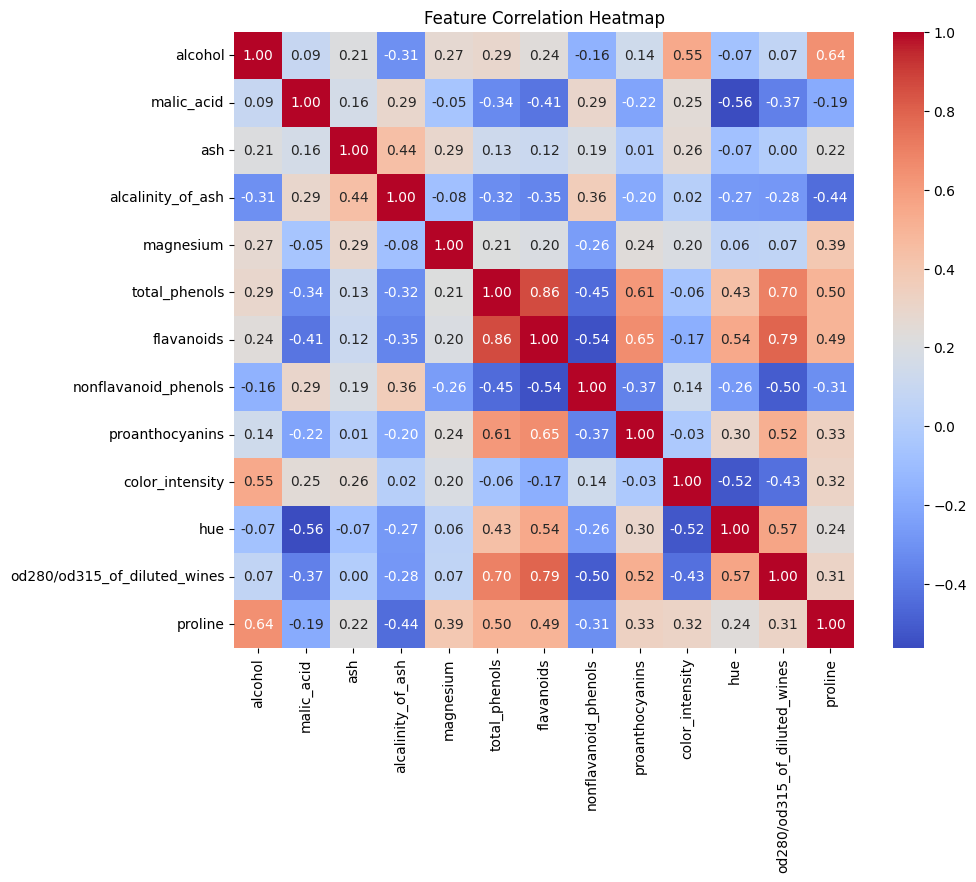

In [9]:
import seaborn as sns
# 绘制特征之间的相关性热图
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(X, columns=feature_names).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()